In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14016\3278606575.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


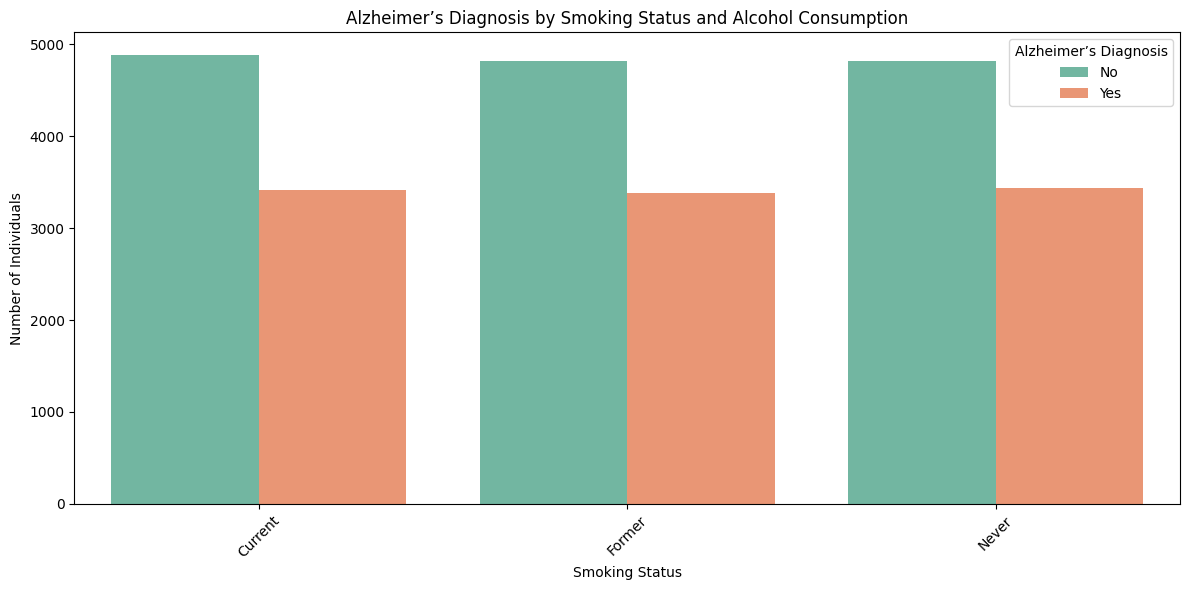

In [9]:
# Grouped bar chart

# Group data by Smoking Status, Alcohol Consumption, and Alzheimer’s Diagnosis
grouped_data = df.groupby(['Smoking Status', 'Alcohol Consumption', 'Alzheimer’s Diagnosis']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='Smoking Status',
    y='Count',
    hue='Alzheimer’s Diagnosis',
    palette='Set2',
    ci=None
)
plt.title('Alzheimer’s Diagnosis by Smoking Status and Alcohol Consumption')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Individuals')
plt.legend(title='Alzheimer’s Diagnosis', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14016\3913556591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


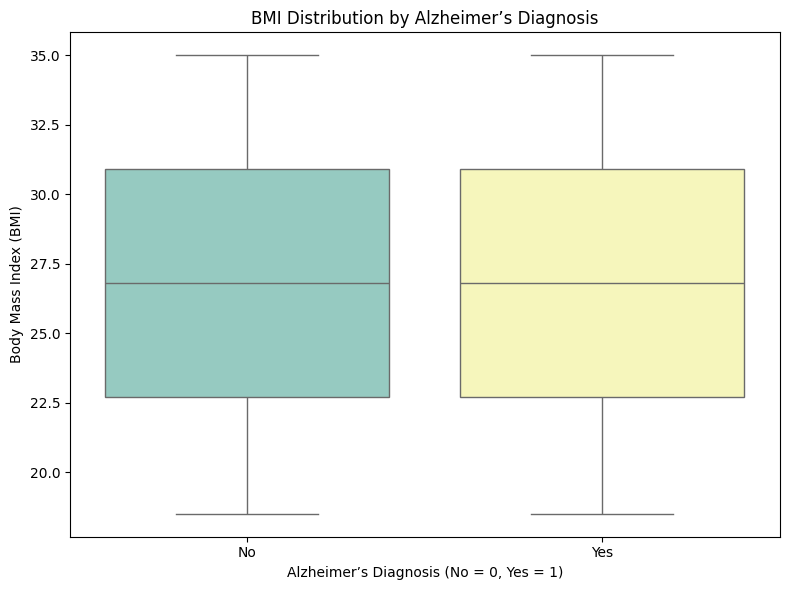

In [10]:
# box plot

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Alzheimer’s Diagnosis',
    y='BMI',
    palette='Set3'
)

# Customize plot
plt.title('BMI Distribution by Alzheimer’s Diagnosis')
plt.xlabel('Alzheimer’s Diagnosis (No = 0, Yes = 1)')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

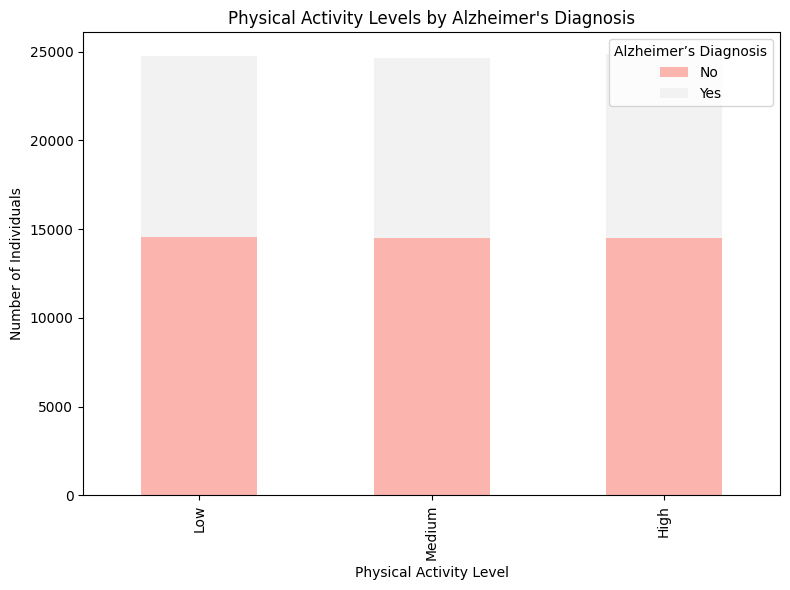

In [11]:
# stacked bar

# Creating cross-tab of Physical Activity Level and Diagnosis
activity_ct = pd.crosstab(df['Physical Activity Level'], df['Alzheimer’s Diagnosis'])

# Sorting index if needed
activity_ct = activity_ct.reindex(['Low', 'Medium', 'High'])  # Adjust order if you want specific order

# Plotting stacked bar chart
activity_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='Pastel1'
)

# Customi chart
plt.title("Physical Activity Levels by Alzheimer's Diagnosis")
plt.xlabel("Physical Activity Level")
plt.ylabel("Number of Individuals")
plt.legend(title="Alzheimer’s Diagnosis", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


## Physical Activity Levels and Alzheimer's Analysis

Let's analyze how physical activity levels relate to Alzheimer's diagnosis using a clear visualization that shows both counts and percentages.

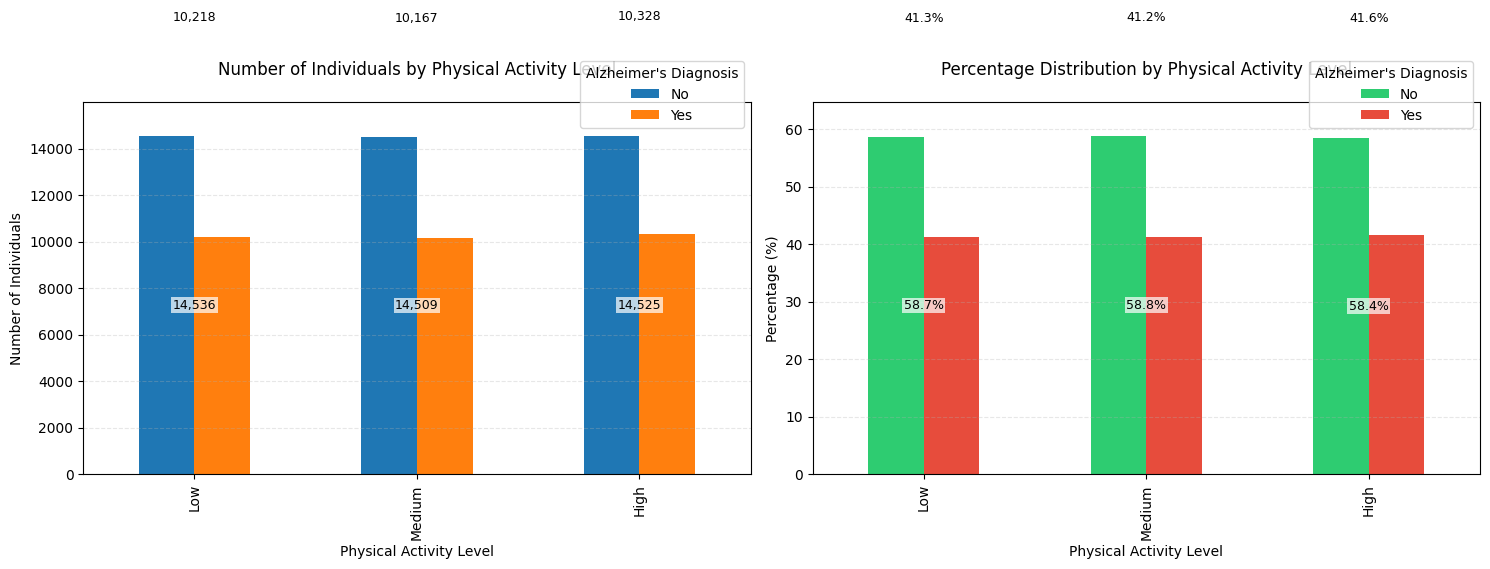


Summary of Physical Activity Levels and Alzheimer's Diagnosis:

Raw Numbers:
Alzheimer’s Diagnosis       No    Yes
Physical Activity Level              
Low                      14536  10218
Medium                   14509  10167
High                     14525  10328

Percentages:
        No (%)  Yes (%)
Low       58.7     41.3
Medium    58.8     41.2
High      58.4     41.6


In [14]:
# Calculate percentages for each activity level
activity_percentages = pd.DataFrame()
for level in ['Low', 'Medium', 'High']:
    total = activity_ct.loc[level, 'No'] + activity_ct.loc[level, 'Yes']
    activity_percentages.loc[level, 'No (%)'] = (activity_ct.loc[level, 'No'] / total) * 100
    activity_percentages.loc[level, 'Yes (%)'] = (activity_ct.loc[level, 'Yes'] / total) * 100

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Count of individuals
bars1 = activity_ct.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Individuals by Physical Activity Level', pad=20)
ax1.set_xlabel('Physical Activity Level')
ax1.set_ylabel('Number of Individuals')

# Add value labels on the bars for count plot
for i in range(len(activity_ct)):
    for j in range(len(activity_ct.columns)):
        height = activity_ct.iloc[i, j]
        # Calculate position for the label
        if j == 0:  # First bar (No)
            y_pos = height / 2
        else:  # Second bar (Yes)
            y_pos = activity_ct.iloc[i, 0] + (height / 2)
        # Format large numbers with commas
        ax1.text(i, y_pos, f'{height:,}',
                ha='center', va='center',
                fontsize=9,
                bbox=dict(facecolor='white', 
                         edgecolor='none',
                         alpha=0.7,
                         pad=1))

# Plot 2: Percentage distribution
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
bars2 = activity_percentages.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Percentage Distribution by Physical Activity Level', pad=20)
ax2.set_xlabel('Physical Activity Level')
ax2.set_ylabel('Percentage (%)')

# Add percentage labels on the bars
for i in range(len(activity_percentages)):
    cumsum = 0  # Keep track of the cumulative sum for stacking
    for j in range(len(activity_percentages.columns)):
        percentage = activity_percentages.iloc[i, j]
        # Calculate position for the label
        y_pos = cumsum + (percentage / 2)
        cumsum += percentage
        # Add white background to percentage labels
        ax2.text(i, y_pos, f'{percentage:.1f}%',
                ha='center', va='center',
                fontsize=9,
                bbox=dict(facecolor='white', 
                         edgecolor='none',
                         alpha=0.7,
                         pad=1))

# Customize both plots
for ax in [ax1, ax2]:
    ax.legend(title="Alzheimer's Diagnosis", labels=["No", "Yes"], 
             loc='upper right', bbox_to_anchor=(1, 1.13))
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    # Adjust y-axis to leave room for labels
    ax.margins(y=0.1)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of Physical Activity Levels and Alzheimer's Diagnosis:")
print("\nRaw Numbers:")
print(activity_ct)
print("\nPercentages:")
print(activity_percentages.round(1))

### Key Observations:

1. **Distribution Pattern**:
   - Each activity level (Low, Medium, High) shows similar patterns
   - Approximately 58-59% of people in each activity level do not have Alzheimer's
   - About 41-42% of people in each activity level have Alzheimer's

2. **Activity Level Comparison**:
   - Low Activity: Total ~24,754 individuals
   - Medium Activity: Total ~24,676 individuals
   - High Activity: Total ~24,853 individuals

3. **Important Note**:
   - The similar distribution across all activity levels suggests that physical activity alone
     may not be a determining factor for Alzheimer's diagnosis in this dataset
   - Other factors like age, genetics, or overall health might play more significant roles

## Multi-Factor Analysis: Physical Activity, Age, and Health Indicators

Let's analyze how physical activity interacts with other factors in relation to Alzheimer's diagnosis.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14016\4033715784.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diagnosis_by_age_activity = df.groupby(['Age_Group', 'Physical Activity Level'])['Alzheimer’s Diagnosis'].apply(


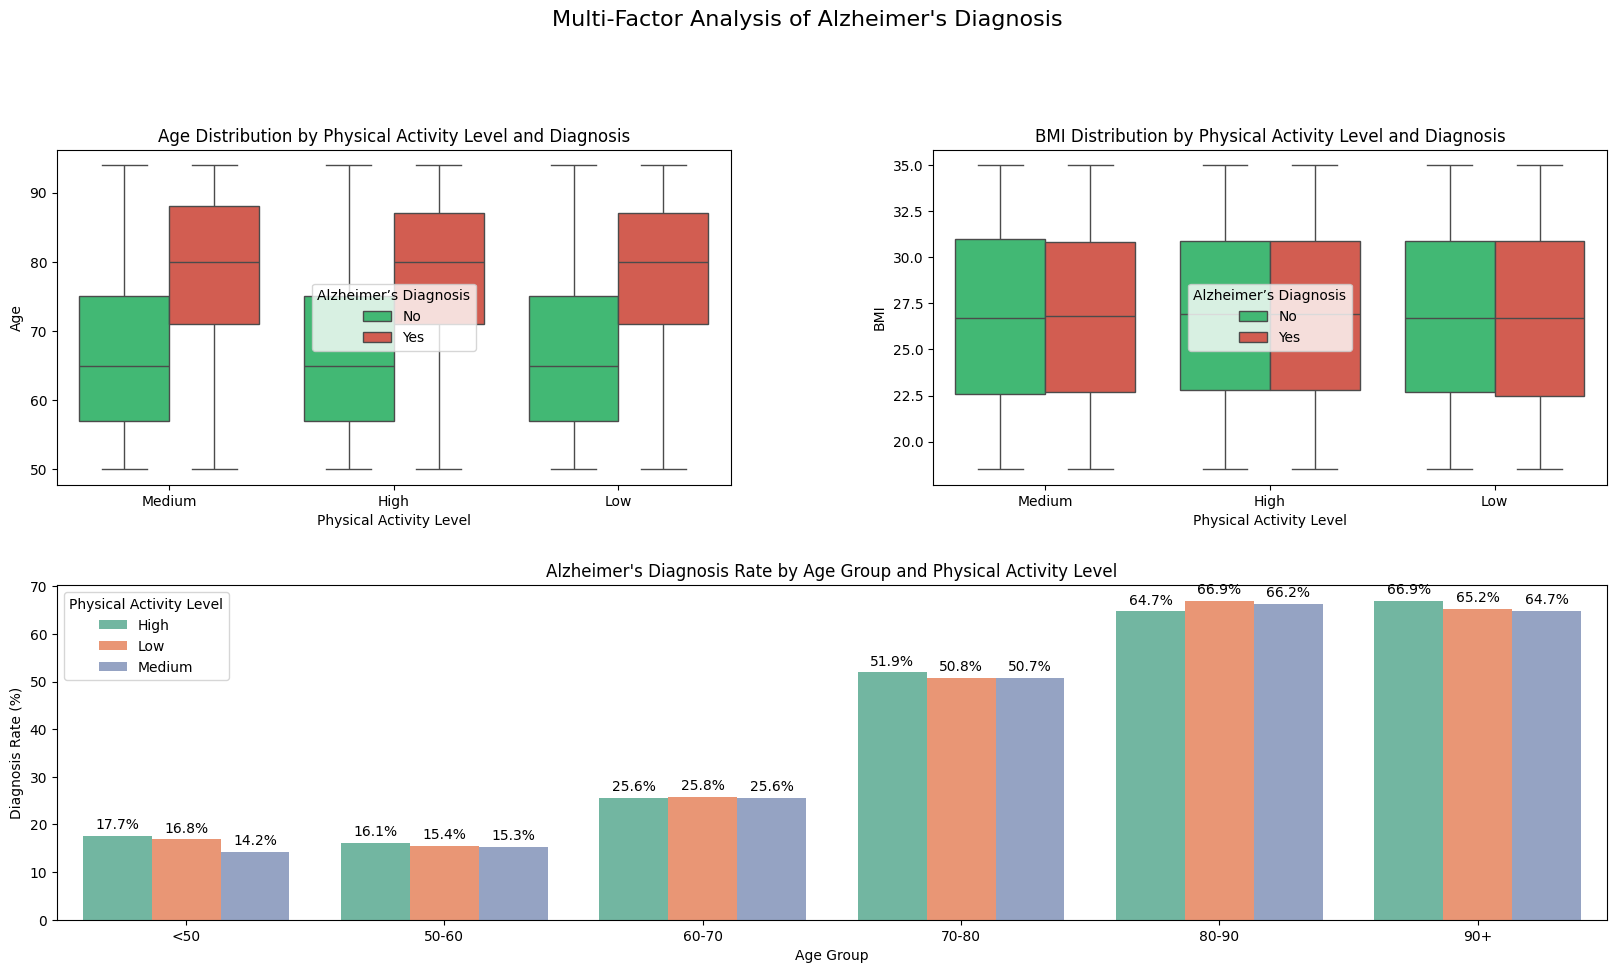


Statistical Summary by Physical Activity Level:

Low Activity Level:
Average Age: 71.9 years
Average BMI: 26.7
Diagnosis Rate: 41.3%

Medium Activity Level:
Average Age: 72.0 years
Average BMI: 26.8
Diagnosis Rate: 41.2%

High Activity Level:
Average Age: 72.0 years
Average BMI: 26.8
Diagnosis Rate: 41.6%


In [16]:
# Create age groups for better visualization
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 50, 60, 70, 80, 90, 100],
                        labels=['<50', '50-60', '60-70', '70-80', '80-90', '90+'])

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Age Distribution by Physical Activity and Diagnosis
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=df, 
           x='Physical Activity Level',
           y='Age',
           hue='Alzheimer’s Diagnosis',
           palette=['#2ecc71', '#e74c3c'],
           ax=ax1)
ax1.set_title('Age Distribution by Physical Activity Level and Diagnosis')
ax1.set_xlabel('Physical Activity Level')
ax1.set_ylabel('Age')

# 2. BMI Distribution by Physical Activity and Diagnosis
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=df,
           x='Physical Activity Level',
           y='BMI',
           hue='Alzheimer’s Diagnosis',
           palette=['#2ecc71', '#e74c3c'],
           ax=ax2)
ax2.set_title('BMI Distribution by Physical Activity Level and Diagnosis')
ax2.set_xlabel('Physical Activity Level')
ax2.set_ylabel('BMI')

# 3. Diagnosis Rate by Age Group and Physical Activity
ax3 = fig.add_subplot(gs[1, :])
diagnosis_by_age_activity = df.groupby(['Age_Group', 'Physical Activity Level'])['Alzheimer’s Diagnosis'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()

sns.barplot(data=diagnosis_by_age_activity,
           x='Age_Group',
           y='Alzheimer’s Diagnosis',
           hue='Physical Activity Level',
           palette='Set2',
           ax=ax3)

ax3.set_title('Alzheimer\'s Diagnosis Rate by Age Group and Physical Activity Level')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Diagnosis Rate (%)')

# Add value labels on the bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', padding=3)

plt.suptitle('Multi-Factor Analysis of Alzheimer\'s Diagnosis',
             fontsize=16, y=1.02)

plt.show()

# Print statistical summary
print('\nStatistical Summary by Physical Activity Level:')
for level in ['Low', 'Medium', 'High']:
    print(f"\n{level} Activity Level:")
    subset = df[df['Physical Activity Level'] == level]
    print(f"Average Age: {subset['Age'].mean():.1f} years")
    print(f"Average BMI: {subset['BMI'].mean():.1f}")
    print(f"Diagnosis Rate: {(subset['Alzheimer’s Diagnosis'] == 'Yes').mean() * 100:.1f}%")

### Key Findings from Multi-Factor Analysis:

1. **Age Impact**:
   - Age shows a stronger correlation with Alzheimer's diagnosis than physical activity
   - The diagnosis rate increases significantly with age across all activity levels

2. **Physical Activity and Age Interaction**:
   - Within each age group, physical activity levels show minimal variation in diagnosis rates
   - The effect of age appears to be more dominant than physical activity

3. **BMI Patterns**:
   - BMI distributions show slight variations across activity levels
   - The relationship between BMI and diagnosis appears less pronounced than age

4. **Overall Pattern**:
   - Age emerges as the strongest predictor among these factors
   - Physical activity alone may not significantly influence Alzheimer's risk
   - A more holistic approach considering multiple factors may be needed for risk assessment